In [282]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import roc_auc_score
np.random.seed(42)
# Load normal and anomalous logs from text files
normal_log = np.loadtxt('log_normal_pioneer.txt')
anomalous_log = np.loadtxt('log_anomalous_pioneer.txt')

normal_log_test = np.loadtxt('log_normal_pioneer_test.txt')
anomalous_log_test = np.loadtxt('log_anomalous_pioneer_test.txt')

normal_log = normal_log[~np.isnan(normal_log).any(axis=1)]
normal_log = normal_log[np.isfinite(normal_log).all(axis=1)]

anomalous_log = anomalous_log[~np.isnan(anomalous_log).any(axis=1)]
anomalous_log = anomalous_log[np.isfinite(anomalous_log).all(axis=1)]

normal_log_test = normal_log_test[~np.isnan(normal_log_test).any(axis=1)]
normal_log_test = normal_log_test[np.isfinite(normal_log_test).all(axis=1)]

anomalous_log_test = anomalous_log_test[~np.isnan(anomalous_log_test).any(axis=1)]
anomalous_log_test = anomalous_log_test[np.isfinite(anomalous_log_test).all(axis=1)]


# Combine the logs and add labels (0 for normal, 1 for anomalous)

logs = np.concatenate((normal_log, anomalous_log), axis=0)
labels = np.concatenate((np.zeros(len(normal_log)), np.ones(len(anomalous_log))))

logs_test = np.concatenate((normal_log_test, anomalous_log_test), axis=0)
labels_test = np.concatenate((np.zeros(len(normal_log_test)), np.ones(len(anomalous_log_test))))

# Split the data into training and testing sets
train_data, _, train_labels, _ = train_test_split(logs, labels, test_size=0.2,random_state=42)

_, test_data, _, test_labels = train_test_split(logs_test, labels_test, test_size=0.5,random_state=42)

scaler = MinMaxScaler()

train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)





In [283]:
logs.shape

(362, 27)

In [284]:
#LR

In [292]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
roc_scores = []
num_iterations = 10
classification_reports = []
precisions = []
recalls = []
f1s = []
accuracies=[]

for i in range(num_iterations):
    # Train a logistic regression model
    lr = LogisticRegression(max_iter=1000)
    lr.fit(train_data_scaled, train_labels)

    # Predict on the test set and compute accuracy
    pred_labels = lr.predict(test_data_scaled)
    # Get indices of anomalous instances
    anomaly_indices = np.where(pred_labels == 1)[0]
    # Evaluate the model's performance
    report = classification_report(test_labels, pred_labels, digits=4, output_dict=True)
    classification_reports.append(report)
    roc_score = roc_auc_score(test_labels, pred_labels)
    
    roc_scores.append(roc_score)
    precisions.append(report['weighted avg']['precision'])
    recalls.append(report['weighted avg']['recall'])
    f1s.append(report['weighted avg']['f1-score'])
    accuracies.append(report['accuracy'])

# Calculate average metrics
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1s)
avg_accuracy = np.mean(accuracies)
avg_roc_score = np.mean(roc_scores)

print(f'Average ROC score: {avg_roc_score:.4f}')
print(f'Average precision: {avg_precision:.4f}')
print(f'Average recall: {avg_recall:.4f}')
print(f'Average Accuracy: {avg_accuracy:.4f}')

print(f'Average F1-score: {avg_f1:.4f}')


Average ROC score: 0.7490
Average precision: 0.7804
Average recall: 0.7736
Average Accuracy: 0.7736
Average F1-score: 0.7660


In [286]:
#SVM

In [293]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

num_iterations = 10
classification_reports = []
precisions = []
recalls = []
f1s = []
accuracies=[]
roc_scores = []

for i in range(num_iterations):
    # Create a SVM classifier with a linear kernel
    svm = SVC(kernel='linear')

    # Train the classifier on the training data
    svm.fit(train_data_scaled, train_labels)

    # Make predictions on the testing data
    pred_labels = svm.predict(test_data_scaled)

    # Evaluate the model's performance
    report = classification_report(test_labels, pred_labels, digits=4, output_dict=True)
    classification_reports.append(report)
    roc_score = roc_auc_score(test_labels, pred_labels)
    
    roc_scores.append(roc_score)
    precisions.append(report['weighted avg']['precision'])
    recalls.append(report['weighted avg']['recall'])
    f1s.append(report['weighted avg']['f1-score'])
    accuracies.append(report['accuracy'])

# Calculate average metrics
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1s)
avg_accuracy = np.mean(accuracies)
avg_roc_score = np.mean(roc_scores)

print(f'Average ROC score: {avg_roc_score:.4f}')
print(f'Average precision: {avg_precision:.4f}')
print(f'Average recall: {avg_recall:.4f}')
print(f'Average Accuracy: {avg_accuracy:.4f}')

print(f'Average F1-score: {avg_f1:.4f}')


Average ROC score: 0.7308
Average precision: 0.7435
Average recall: 0.7453
Average Accuracy: 0.7453
Average F1-score: 0.7427


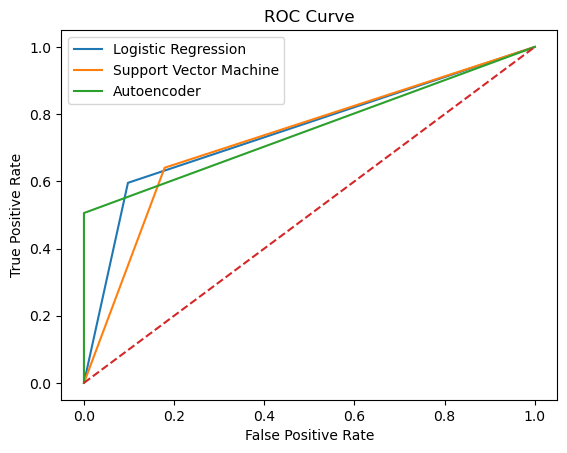

In [298]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate FPR and TPR at different thresholds
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_labels, lr.predict(test_data_scaled))
fpr_svm, tpr_svm, thresholds_svm = roc_curve(test_labels, svm.predict(test_data_scaled))
fpr_ae, tpr_ae, thresholds_ae = roc_curve(test_labels, anomalies)
# Plot the ROC curve
plt.figure()

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine')
plt.plot(fpr_ae, tpr_ae, label='Autoencoder')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend()
plt.savefig('roc-compare-pioneer.pdf')
plt.show()


In [224]:
#OC-SVM

In [251]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

num_iterations = 10

classification_reports = []
precisions = []
recalls = []
f1s = []
accuracies=[]

for i in range(num_iterations):
    clf = OneClassSVM()  # nu is a hyperparameter between 0 and 1
    clf.fit(train_data_scaled)

    # Predict on the test set
    pred_labels = clf.predict(test_data_scaled)
    pred_labels[pred_labels == 1] = 0  # convert predicted labels from 1 to 0
    pred_labels[pred_labels == -1] = 1  # convert predicted labels from -1 to 1
    
     # Evaluate the model's performance
    report = classification_report(test_labels, pred_labels, digits=4, output_dict=True)
    classification_reports.append(report)
    
    precisions.append(report['weighted avg']['precision'])
    recalls.append(report['weighted avg']['recall'])
    f1s.append(report['weighted avg']['f1-score'])
    accuracies.append(report['accuracy'])

# Calculate average metrics
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1s)
avg_accuracy = np.mean(accuracies)

print(f'Average precision: {avg_precision:.4f}')
print(f'Average recall: {avg_recall:.4f}')
print(f'Average Accuracy: {avg_accuracy:.4f}')

print(f'Average F1-score: {avg_f1:.4f}')


Average precision: 0.6530
Average recall: 0.5849
Average Accuracy: 0.5849
Average F1-score: 0.5734


In [291]:
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np

num_iterations = 10
thresholds = []
classification_reports = []
precisions = []
recalls = []
f1s = []
accuracies=[]
roc_scores = []
for i in range(num_iterations):
    normal_train_data = train_data_scaled[train_labels == 0]

    # Define the autoencoder model
    input_dim = train_data_scaled.shape[1]
    encoding_dim = 16

    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation="relu")(input_layer)
    encoder = Dense(encoding_dim // 2, activation="relu")(encoder)
    decoder = Dense(encoding_dim, activation="relu")(encoder)
    decoder = Dense(input_dim, activation="relu")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)

    # Compile and fit the model
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    autoencoder.fit(normal_train_data, normal_train_data, epochs=50, batch_size=32)

    # Get reconstruction error on the training data
    train_predictions = autoencoder.predict(normal_train_data)
    mse_train = np.mean(np.power(normal_train_data - train_predictions, 2), axis=1)

    # Set the threshold as the maximum reconstruction error in the training data
    threshold = np.max(mse_train) 
    thresholds.append(threshold)

    # Get reconstruction error on the test data
    test_predictions = autoencoder.predict(test_data_scaled)
    mse_test = np.mean(np.power(test_data_scaled - test_predictions, 2), axis=1)

    # Detect anomalies in the test data
    anomalies = mse_test > threshold

    # Evaluate the model's performance
    report = classification_report(test_labels, anomalies, digits=4, output_dict=True)
    classification_reports.append(report)
    roc_score = roc_auc_score(test_labels, anomalies)
    
    roc_scores.append(roc_score)
    precisions.append(report['weighted avg']['precision'])
    recalls.append(report['weighted avg']['recall'])
    f1s.append(report['weighted avg']['f1-score'])
    accuracies.append(report['accuracy'])

# Calculate average metrics
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1s)
avg_accuracy = np.mean(accuracies)
avg_roc_score = np.mean(roc_scores)

print(f'Average ROC score: {avg_roc_score:.4f}')
print(f'Average precision: {avg_precision:.4f}')
print(f'Average recall: {avg_recall:.4f}')
print(f'Average Accuracy: {avg_accuracy:.4f}')

print(f'Average F1-score: {avg_f1:.4f}')


Epoch 1/50
9/9 [==============================] - 2s 5ms/step - loss: 0.2157
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1768
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1457
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1255
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 0.1107
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1030
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0992
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0973
Epoch 9/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0961
Epoch 10/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0954
Epoch 11/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0947
Epoch 12/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0940
Epoch 13/50
9/9 [==============================] - 0s 4ms/step - loss: 0.

9/9 [==============================] - 0s 2ms/step - loss: 0.1890
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1691
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 0.1627
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 0.1566
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1523
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1466
Epoch 9/50
9/9 [==============================] - 0s 2ms/step - loss: 0.1383
Epoch 10/50
9/9 [==============================] - 0s 2ms/step - loss: 0.1321
Epoch 11/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1278
Epoch 12/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1246
Epoch 13/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1226
Epoch 14/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1215
Epoch 15/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1207
Epoc

9/9 [==============================] - 0s 3ms/step - loss: 0.1385
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1257
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1164
Epoch 8/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1104
Epoch 9/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1070
Epoch 10/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1052
Epoch 11/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1043
Epoch 12/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1037
Epoch 13/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1032
Epoch 14/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1028
Epoch 15/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1024
Epoch 16/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1020
Epoch 17/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1016
Ep

9/9 [==============================] - 0s 4ms/step - loss: 0.1070
Epoch 8/50
9/9 [==============================] - 0s 2ms/step - loss: 0.1019
Epoch 9/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0995
Epoch 10/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0981
Epoch 11/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0976
Epoch 12/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0971
Epoch 13/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0968
Epoch 14/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0965
Epoch 15/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0962
Epoch 16/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0959
Epoch 17/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0957
Epoch 18/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0953
Epoch 19/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0951


9/9 [==============================] - 0s 4ms/step - loss: 0.1354
Epoch 10/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1282
Epoch 11/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1238
Epoch 12/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1211
Epoch 13/50
9/9 [==============================] - 0s 5ms/step - loss: 0.1196
Epoch 14/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1188
Epoch 15/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1182
Epoch 16/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1178
Epoch 17/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1174
Epoch 18/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1171
Epoch 19/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1167
Epoch 20/50
9/9 [==============================] - 0s 2ms/step - loss: 0.1162
Epoch 21/50
9/9 [==============================] - 0s 4ms/step - loss: 0.115

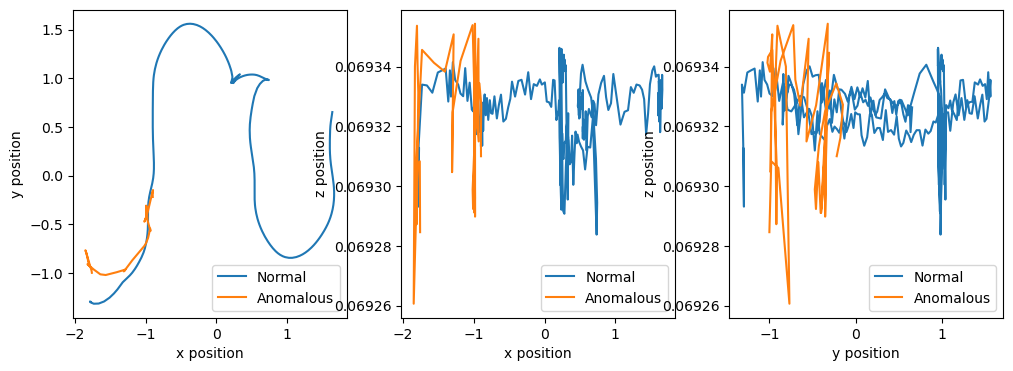

In [265]:
import matplotlib.pyplot as plt
import numpy as np

# Load normal and anomalous logs
normal_log = np.loadtxt('log_normal_pioneer.txt', skiprows=1)
anomalous_log = np.loadtxt('log_anomalous_pioneer.txt', skiprows=1)

# Plot position in x, y, and z dimensions for normal and anomalous logs side-by-side
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].plot(normal_log[:, 1], normal_log[:, 2], label='Normal')
axs[0].plot(anomalous_log[:, 1], anomalous_log[:, 2], label='Anomalous')
axs[0].set_xlabel('x position')
axs[0].set_ylabel('y position')
axs[0].legend()

axs[1].plot(normal_log[:, 1], normal_log[:, 3], label='Normal')
axs[1].plot(anomalous_log[:, 1], anomalous_log[:, 3], label='Anomalous')
axs[1].set_xlabel('x position')
axs[1].set_ylabel('z position')
axs[1].legend()

axs[2].plot(normal_log[:, 2], normal_log[:, 3], label='Normal')
axs[2].plot(anomalous_log[:, 2], anomalous_log[:, 3], label='Anomalous')
axs[2].set_xlabel('y position')
axs[2].set_ylabel('z position')
axs[2].legend()
plt.savefig('x-y-z-plot.jpg')
plt.show()


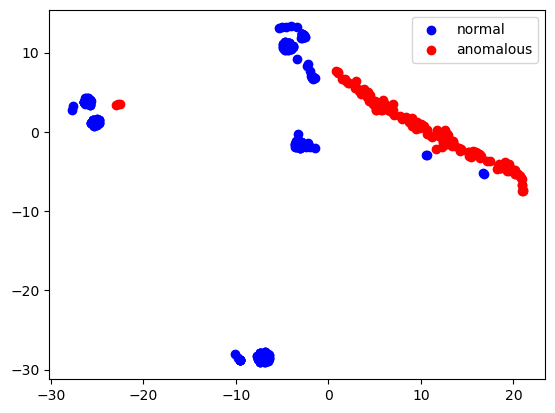

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

normal_data = pd.read_csv('log_normal.txt', delim_whitespace=True)
anomalous_data = pd.read_csv('log_anomalous.txt', delim_whitespace=True)
# Load the normal and anomalous log files into separate pandas dataframes



normal_data = normal_data[~np.isnan(normal_data).any(axis=1)]
normal_data = normal_data[np.isfinite(normal_data).all(axis=1)]

anomalous_data = anomalous_data[~np.isnan(anomalous_data).any(axis=1)]
anomalous_data = anomalous_data[np.isfinite(anomalous_data).all(axis=1)]

# Combine the two dataframes into one
data = pd.concat([normal_data, anomalous_data])

# Create a numpy array from the combined dataframe
X = data.to_numpy()

# Create labels for the data points (0 for normal, 1 for anomalous)
y = np.concatenate([np.zeros(len(normal_data)), np.ones(len(anomalous_data))])

# Apply t-SNE to reduce the dimensionality of the data to 2 dimensions
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

# Plot the t-SNE results with different colors for the two clusters
plt.scatter(X_tsne[:, 0][y==0], X_tsne[:, 1][y==0], c='blue', label='normal')
plt.scatter(X_tsne[:, 0][y==1], X_tsne[:, 1][y==1], c='red', label='anomalous')
plt.legend()
plt.show()


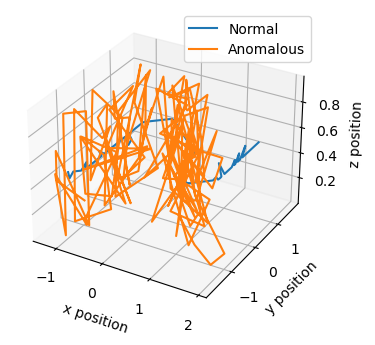

In [267]:
import matplotlib.pyplot as plt
import numpy as np

# Load normal and anomalous logs
normal_log = np.loadtxt('log_normal.txt', skiprows=1)
anomalous_log = np.loadtxt('log_anomalous.txt', skiprows=1)

# Plot position in x, y, and z dimensions for normal and anomalous logs
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(projection='3d')
ax.plot(normal_log[:, 1], normal_log[:, 2], normal_log[:, 3], label='Normal')
ax.plot(anomalous_log[:, 1], anomalous_log[:, 2], anomalous_log[:, 3], label='Anomalous')
ax.set_xlabel('x position')
ax.set_ylabel('y position')
ax.set_zlabel('z position')
ax.legend()
plt.savefig('x-y-z-plot.jpg')
plt.show()


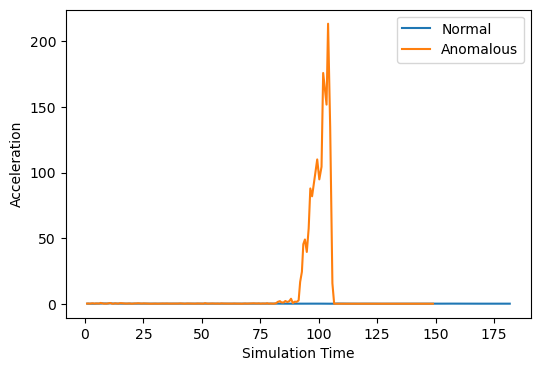

In [272]:
import matplotlib.pyplot as plt
import numpy as np

# Load normal and anomalous logs
normal_log = np.loadtxt('log_normal_pioneer_test.txt', skiprows=1)
anomalous_log = np.loadtxt('log_anomalous_pioneer_test.txt', skiprows=1)

# Plot acc for normal and anomalous logs
plt.figure(figsize=(6, 4))
plt.plot(normal_log[:, 0], normal_log[:, 17], label='Normal')
plt.plot(anomalous_log[:, 0], anomalous_log[:, 17], label='Anomalous')
plt.xlabel('Simulation Time')
plt.ylabel('Acceleration')
plt.legend()
plt.savefig('acceleration-plot-pioneer.jpg')
plt.show()


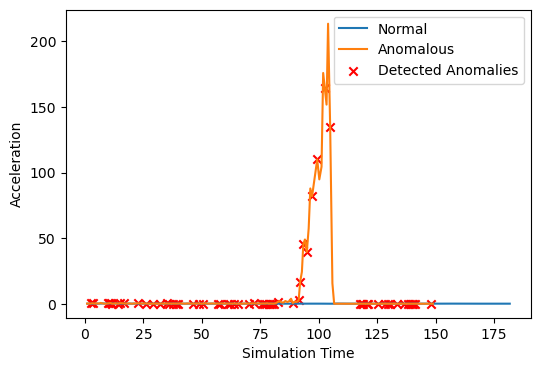

In [278]:
import matplotlib.pyplot as plt
import numpy as np

# Load normal and anomalous logs
normal_log = np.loadtxt('log_normal_pioneer_test.txt', skiprows=1)
anomalous_log = np.loadtxt('log_anomalous_pioneer_test.txt', skiprows=1)

# Plot acc for normal and anomalous logs
plt.figure(figsize=(6, 4))
plt.plot(normal_log[:, 0], normal_log[:, 17], label='Normal')
plt.plot(anomalous_log[:, 0], anomalous_log[:, 17], label='Anomalous')

# Mark detected anomalies
plt.scatter(anomalous_log[anomaly_indices, 0], anomalous_log[anomaly_indices, 17], marker='x', color='red', label='Detected Anomalies')


plt.xlabel('Simulation Time')
plt.ylabel('Acceleration')
plt.legend()
plt.savefig('acceleration-plot_pioneer.pdf')
plt.show()
